In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [103]:
#Read files:
train = pd.read_csv(r"C:\Users\PRATIK PANIGRAHI\Desktop\train.csv")
test = pd.read_csv(r"C:\Users\PRATIK PANIGRAHI\Desktop\test.csv")

In [104]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


# Data Exploration

In [105]:
train.shape

(8523, 12)

In [106]:
test.shape

(5681, 11)

In [107]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [108]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [109]:
#missing value treatment for train data
train["Item_Weight"] =train["Item_Weight"].fillna((train["Item_Weight"].mean()))
train["Outlet_Size"]=train["Outlet_Size"].fillna((train["Outlet_Size"].mode()[0]))
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [110]:
#missing value treatment for train data
test["Item_Weight"] =test["Item_Weight"].fillna((test["Item_Weight"].mean()))
test["Outlet_Size"]=test["Outlet_Size"].fillna((test["Outlet_Size"].mode()[0]))
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [111]:
#changing categorical value to numerical value of train data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in train.columns:
    train[col]=le.fit_transform(train[col])
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,284,1,664,4,5592,9,4,1,0,1,2540
1,8,57,2,880,14,473,3,8,1,2,2,422
2,662,376,1,715,10,2901,9,4,1,0,1,1639
3,1121,393,2,0,6,4227,0,3,1,2,0,670
4,1297,265,1,0,9,627,1,1,0,2,1,865


In [112]:
#changing categorical value to numerical value of test data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in train.columns:
    train[col]=le.fit_transform(train[col])
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,284,1,664,4,5592,9,4,1,0,1,2540
1,8,57,2,880,14,473,3,8,1,2,2,422
2,662,376,1,715,10,2901,9,4,1,0,1,1639
3,1121,393,2,0,6,4227,0,3,1,2,0,670
4,1297,265,1,0,9,627,1,1,0,2,1,865


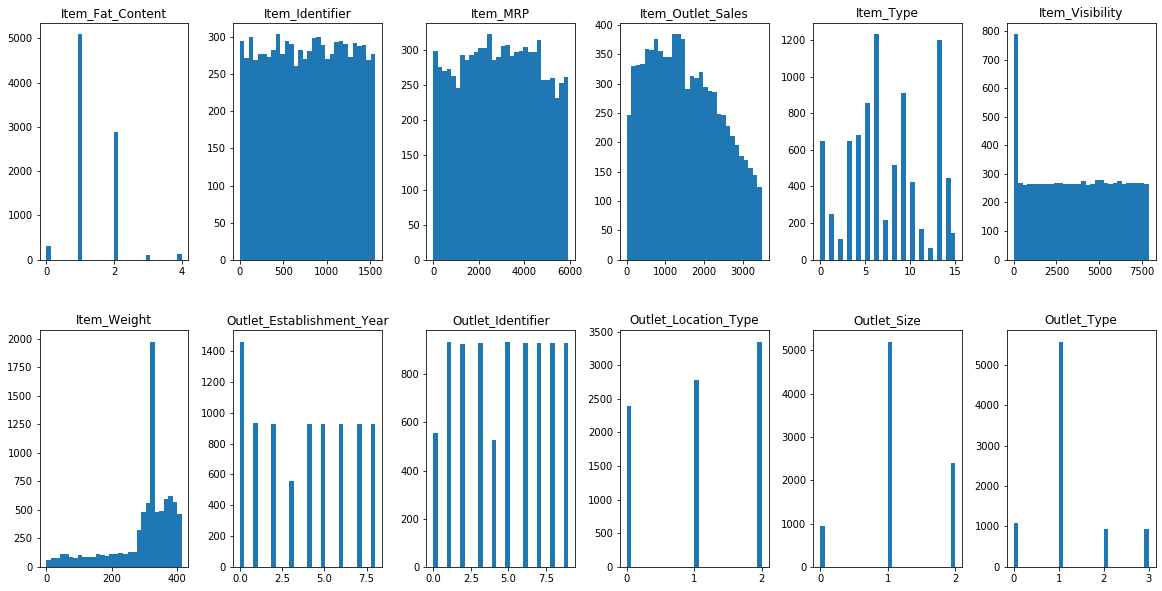

In [113]:
train.hist(figsize=(20,10),grid=False,layout=(2,6),bins=30)
plt.show()

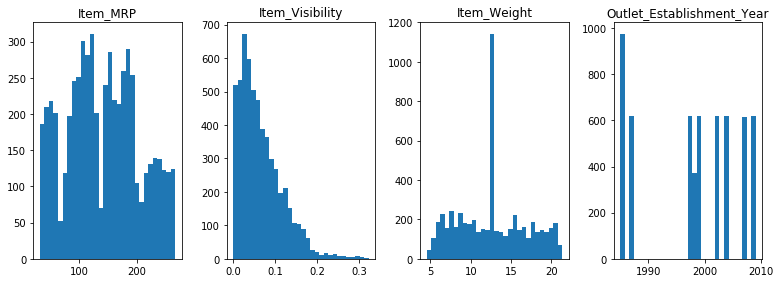

In [114]:
test.hist(figsize=(20,10),grid=False,layout=(2,6),bins=30)
plt.show()

In [115]:
data = pd.concat([train, test],ignore_index = True)

C:\Users\PRATIK PANIGRAHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [116]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,1,156,5592.0,2540.0,4,664.0,284.0,4,9,0,1,1
1,2,8,473.0,422.0,14,880.0,57.0,8,3,2,1,2
2,1,662,2901.0,1639.0,10,715.0,376.0,4,9,0,1,1
3,2,1121,4227.0,670.0,6,0.0,393.0,3,0,2,1,0
4,1,1297,627.0,865.0,9,0.0,265.0,1,1,2,0,1


It would better to concat the two data to make the analysis smooth

In [117]:
data.corr()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
Item_MRP,1.000000,0.573191,0.510710,0.649510,-0.726239
Item_Outlet_Sales,0.573191,1.000000,-0.109471,0.012597,0.024477
Item_Visibility,0.510710,-0.109471,1.000000,0.615881,-0.699574
Item_Weight,0.649510,0.012597,0.615881,1.000000,-0.884401
Outlet_Establishment_Year,-0.726239,0.024477,-0.699574,-0.884401,1.000000


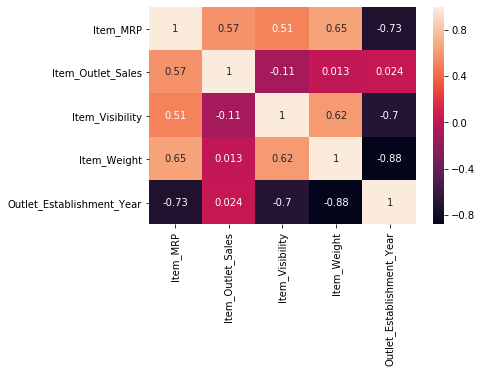

In [118]:
sns.heatmap(data.corr(),annot = True)
plt.show()

Skewness: 0.268806 , highly skewed


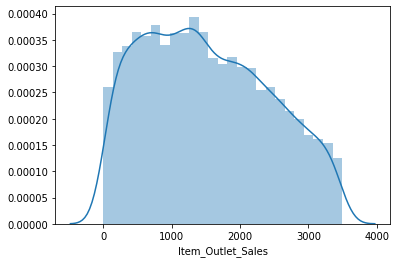

In [119]:
#Checking skewness of the train data
sns.distplot(train["Item_Outlet_Sales"])
print('Skewness: %f' % train['Item_Outlet_Sales'].skew(), ", highly skewed")

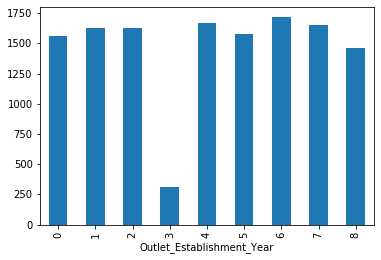

In [120]:
train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

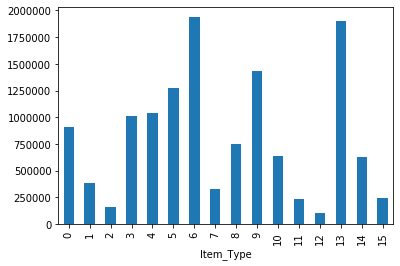

In [121]:
train.groupby('Item_Type')['Item_Outlet_Sales'].sum().plot.bar()

,Item_Outlet_Sales
Outlet_Type,
0,310.291782
1,1644.556751
2,1463.830819
3,2262.383957


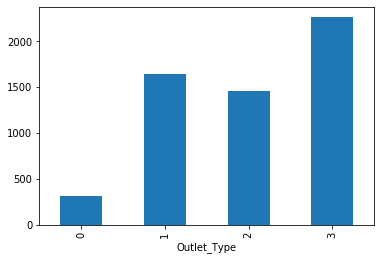

In [122]:
train.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot.bar()
train.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

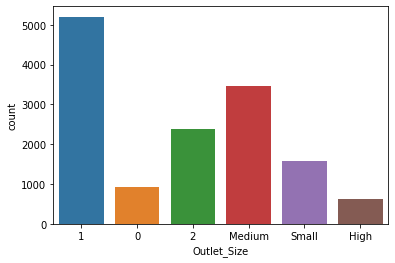

In [123]:
sns.countplot(x="Outlet_Size", data= data)

In [124]:
#combining the Supermarket Type2 and Type3 variables.
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
0,310.291782
1,1644.556751
2,1463.830819
3,2262.383957


In [125]:
data.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type'],
      dtype='object')

In [126]:
for col in data.columns:
    data[col]=pd.to_numeric(data[col],errors='coerce')


In [127]:
#changing categorical value to numerical value of test data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in data.columns:
    data[col]=le.fit_transform(data[col])
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,1,156,9994,2540,4,5940,679,4,9,0,1,1
1,2,8,4875,422,14,6156,452,8,3,2,1,2
2,1,662,7303,1639,10,5991,771,4,9,0,1,1
3,2,1121,8629,670,6,0,788,3,0,2,1,0
4,1,1297,5029,865,9,0,660,1,1,2,0,1


In [128]:
x=data.drop('Item_Outlet_Sales',axis=1)
y=data['Item_Outlet_Sales']


In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest

In [130]:
print(x.shape)
print(y.shape)

(14204, 11)
(14204,)


In [131]:
standardScale=StandardScaler()
standardScale.fit_transform(x)

selectkBest = SelectKBest()
x= selectkBest.fit_transform(x,y)

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.25)

C:\Users\PRATIK PANIGRAHI\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
lm = LinearRegression()
lm.fit(x_train, y_train)
lm.score(x_train,y_train)

0.9215723060989089

In [134]:
y_train_pred = lm.predict(x_train)
y_test_pred = lm.predict(x_test)

In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

Mean Squared error of training set :558849.385402
Mean Squared error of testing set :554360.385559


In [136]:
from sklearn.metrics import r2_score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

R2 Score of training set:0.92
R2 Score of testing set:0.92


In [137]:
predictions = lm.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
rmse

744.5538164292951

In [138]:
After the application of linear regression algorithm,i got R2 score 92% amd 

SyntaxError: invalid syntax (<ipython-input-138-2263b54c13e0>, line 1)

In [140]:
from sklearn.externals import joblib

C:\Users\PRATIK PANIGRAHI\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [142]:
#saving the model as pickl
joblib.dump(lm,"Project 29_bigmart.pkl")

['Project 29_bigmart.pkl']